# Цели работы:

1. Научиться применять базовый функционал библиотеки Keras.
2. Научиться моделировать сверточные нейронные сети для распознавания объектов на изображении.
3. Ознакомиться с основными методами в работе со сверточными нейронными сетями.
4. Ознакомиться с популярными архитектурными решениями для задач классификации изображений.

## Задание.

1. Импортировать набор данных Cifar10.
2. Смоделировать сверточную нейронную сеть со значением метрики accuracy $\geq$ 70.

Свёрточная нейронная сеть — специальная архитектура искусственных нейронных сетей, нацеленная на эффективное распознавание образов. Использует некоторые особенности зрительной коры, в которой были открыты так называемые простые клетки, реагирующие на прямые линии под разными углами, и сложные клетки, реакция которых связана с активацией определённого набора простых клеток. Таким образом, идея свёрточных нейронных сетей заключается в чередовании свёрточных слоёв (англ. convolution layers - пересчёт через kernel с соседними элементами) и субдискретизирующих слоёв (англ. subsampling layers - уменьшение размерности). 

Вывод: была смоделирована свёрточная нейронная сеть с точностью 79% для работы с изображениями набора данных Cifar10. Сеть распознавает объекты на изображении по 10 классам.

In [1]:
import keras
import tensorflow as tf

data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 64s 0us/step


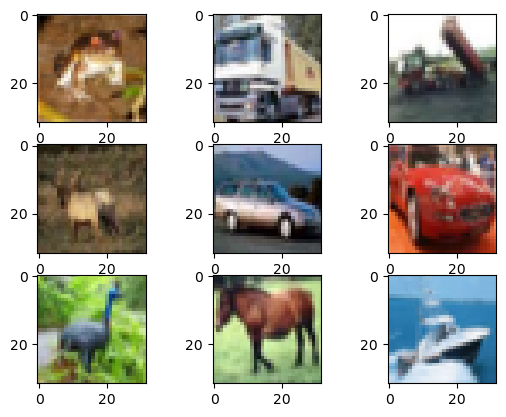

(50000, 32, 32, 3)
Epoch 1/10
1250/1250 [==============================] - 1458s 1s/step - loss: 1.8423 - accuracy: 0.3220 - val_loss: 1.4769 - val_accuracy: 0.4668
Epoch 2/10
1250/1250 [==============================] - 609s 487ms/step - loss: 1.4331 - accuracy: 0.4827 - val_loss: 1.1863 - val_accuracy: 0.5780
Epoch 3/10
1250/1250 [==============================] - 671s 537ms/step - loss: 1.2312 - accuracy: 0.5709 - val_loss: 1.1570 - val_accuracy: 0.5948
Epoch 4/10
1250/1250 [==============================] - 659s 527ms/step - loss: 1.0743 - accuracy: 0.6314 - val_loss: 0.9949 - val_accuracy: 0.6538
Epoch 5/10
1250/1250 [==============================] - 572s 457ms/step - loss: 0.9806 - accuracy: 0.6646 - val_loss: 0.8781 - val_accuracy: 0.7008
Epoch 6/10
1250/1250 [==============================] - 636s 509ms/step - loss: 0.9108 - accuracy: 0.6923 - val_loss: 0.7830 - val_accuracy: 0.7376
Epoch 7/10
1250/1250 [==============================] - 616s 493ms/step - loss: 0.8380 - accura

[0.6194830536842346, 0.7932999730110168]

In [2]:
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras import utils as np_utils

(x_train, y_train), (x_test, y_test) = data

# make a table of images
for i in range(9):
    # add subplot in a position 
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i])
pyplot.show()

# С каждым слоем выявляем всё более абстрактные признаки
# Потом обрабатываем с помощью Dense слоёв
model = keras.Sequential([
    # spatial convolution over images
    # 1 -  the dimensionality of the output space (i.e. the number of output filters in the convolution).
    # 2 - the height and width of the 2D convolution window
    # padding with zeros evenly to the left/right or up/down of the input.
    # relu = max(0, x), linear
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    # Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    # Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 
    MaxPooling2D(pool_size=(2,2)),
    # Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
    Dropout(0.3),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    # Flattens the input. Does not affect the batch size.
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    # softmax = Exp(z[i]) / Sum(Exp(z))
    # 10 classes => 10 outputs
    Dense(10, activation='softmax')
])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# reduce colors to a scale [0;1]
x_train = x_train / 255
x_test = x_test / 255

# print(x_train.shape)

# Converts a class vector (integers) to binary class matrix.
# [0, 1, 2, 3] =>
# [1,0,0,0,], [0,1,0,0], [0,0,1,0], [0,0,0,1]
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Perform training
his = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2)

# Calculate accuracy
model.evaluate(x_test, y_test)

313/313 [==============================] - 23s 68ms/step


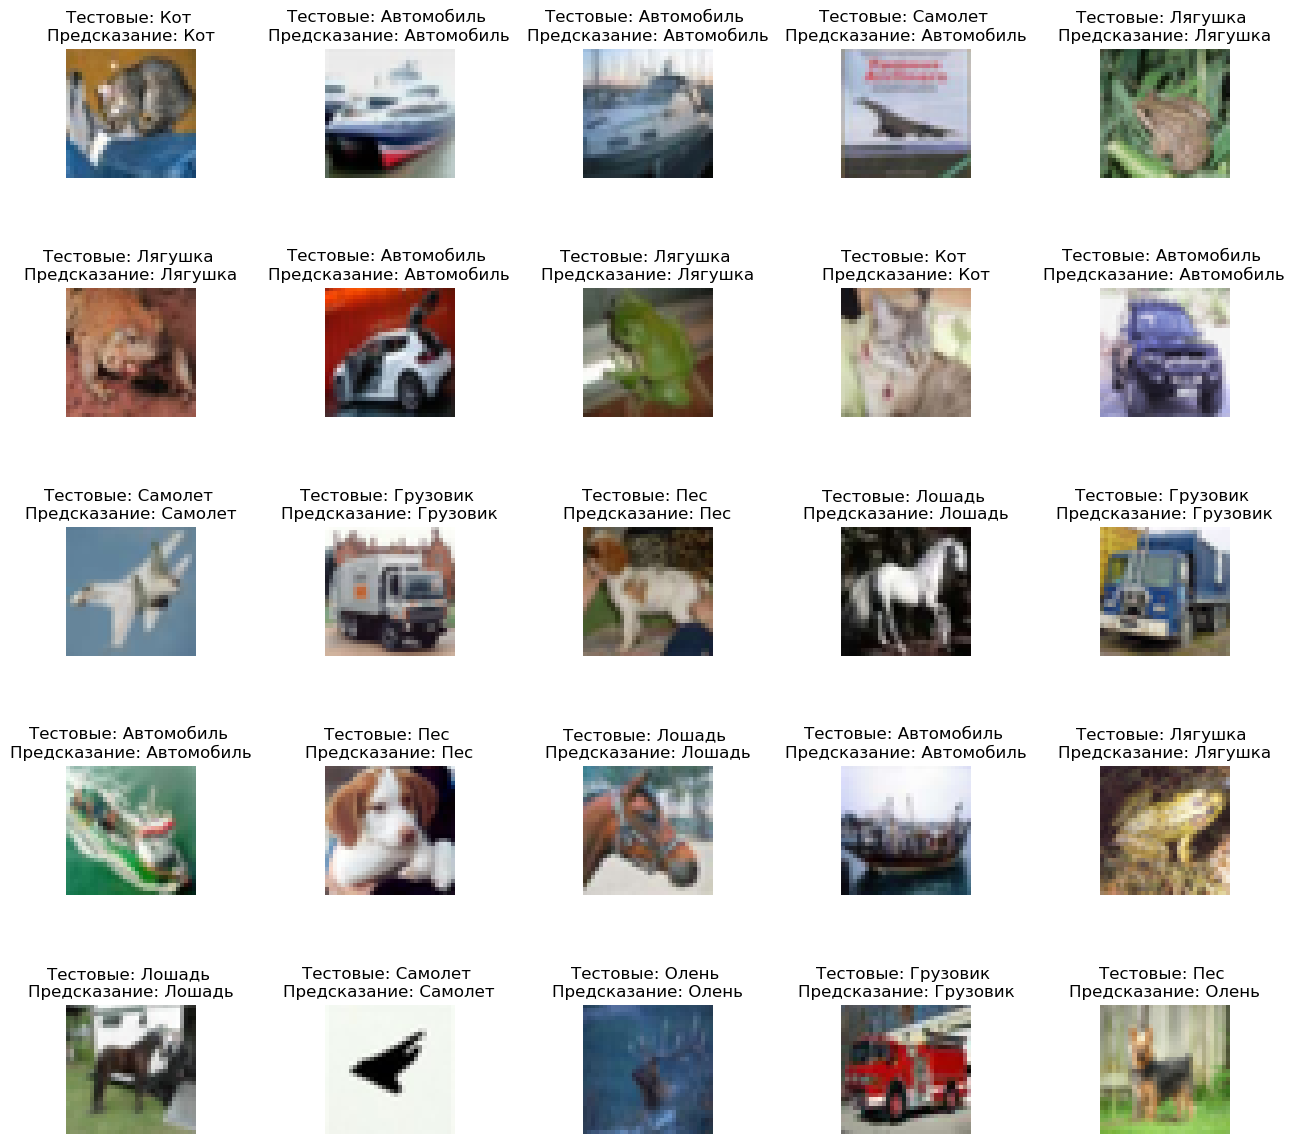

In [3]:
class_names = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень',
               'Пес', 'Лягушка', 'Лошадь', 'Автомобиль', 'Грузовик']

# Do the predictions on test set
pred = model.predict(x_test)

# The most probable class index
pred_classes = np.argmax(pred, axis=1)

fig, axes = pyplot.subplots(5, 5, figsize=(15,15))
# flatten the axis
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Тестовые: %s \nПредсказание: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    pyplot.subplots_adjust(wspace=1)